In [ ]:
pip install numpy

In [ ]:
!pip install tensorflow

In [ ]:
pip install scikit-learn

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
!pip install kaggle


In [ ]:
import os
import zipfile

#put kaggle.json in the right place
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
os.rename("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))

os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

!kaggle datasets download -d farzadnekouei/trash-type-image-dataset

 
with zipfile.ZipFile("trash-type-image-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("trash_dataset")


In [ ]:
import os

for root, dirs, files in os.walk(".", topdown=True):
    print(root)
    for d in dirs:
        print("  📁", d)
    break  


In [ ]:
# נתיב לתיקיית התמונות שהוצאנו מה-zip
data_dir = './trash_dataset/TrashType_Image_Dataset'


# תוויות הקלאסים
classes = ['metal', 'glass', 'paper', 'trash', 'cardboard', 'plastic']

# טעינת התמונות והתיוגים
X = []
y = []

for i, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        try:
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=(256, 256))  # טעינה ושינוי גודל
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            X.append(img_array)
            y.append(i)
        except:
            print(f"בעיה עם התמונה: {img_path}")  # טיפול בשגיאות בקריאת תמונות

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image, UnidentifiedImageError

data_dir = './trash_dataset/TrashType_Image_Dataset'

# Class labels
classes = ['metal', 'glass', 'paper', 'trash', 'cardboard', 'plastic']

# Load images and labels
X = []
y = []

for i, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        
        try:
            # טעינת תמונה דרך PIL ובדיקה אם אפשר לפתוח אותה
            with Image.open(img_path) as img:
                img = img.resize((224, 224))  # שינוי גודל התמונה
                img_array = np.array(img)  # המרת התמונה למערך
                if img_array.shape == (224, 224, 3):  # לוודא שהתמונה בצורת RGB
                    X.append(img_array)
                    y.append(i)
                else:
                    print(f"Skipping {img_path} (invalid shape)")
        except (OSError, UnidentifiedImageError) as e:
            print(f"Error loading image {img_path}: {e}")
            continue  # מדלג על תמונה פגומה

# המרת המידע למערכים
X = np.array(X)
y = np.array(y)



# חלוקה לקבוצת אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Total images: {len(X)}")
print(f"Train set: {len(X_train)} | Test set: {len(X_test)}")


Total images: 2529
Train set: 2023 | Test set: 506


In [2]:
!pip install Pillow


You should consider upgrading via the 'C:\Users\Ziv\OneDrive\מסמכים\שולחן העבודה\מערכות הפעלה\project_py\venv\Scripts\python.exe -m pip install --upgrade pip' command.


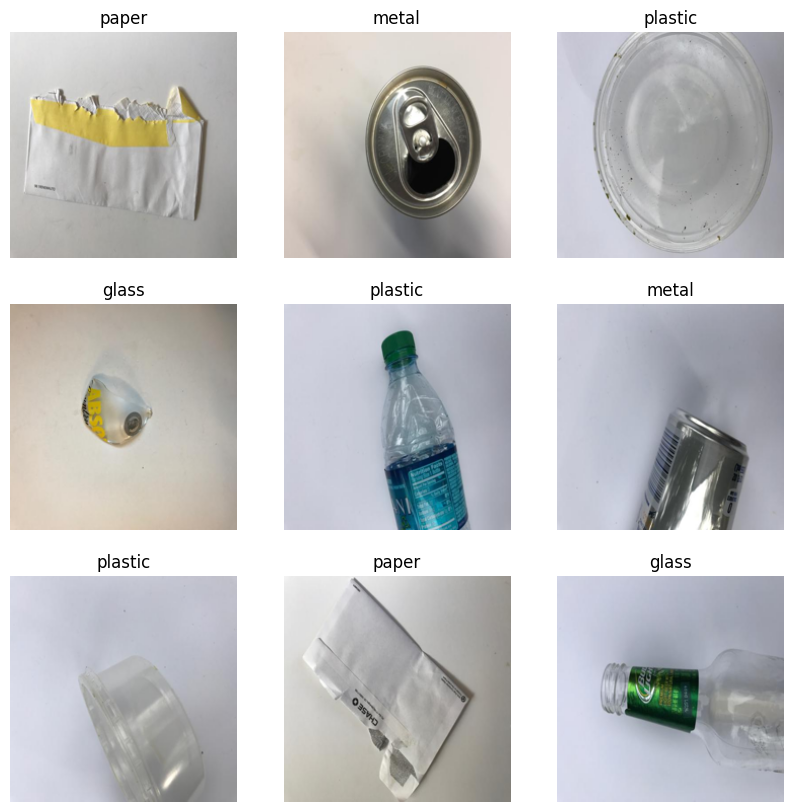

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.title(classes[y_train[i]])
    plt.axis('off')
plt.show()

In [4]:
!pip install matplotlib


You should consider upgrading via the 'C:\Users\Ziv\OneDrive\מסמכים\שולחן העבודה\מערכות הפעלה\project_py\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [6]:
# Load ResNet50 without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add new layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(len(classes), activation='softmax')(x)  # Output layer

# Build the final model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.5926 - loss: 1.5249 - val_accuracy: 0.8142 - val_loss: 0.5316
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.8775 - loss: 0.3275 - val_accuracy: 0.8399 - val_loss: 0.4849
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.9550 - loss: 0.1512 - val_accuracy: 0.8577 - val_loss: 0.4210
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.9628 - loss: 0.1143 - val_accuracy: 0.8834 - val_loss: 0.3608
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 727s 12s/step - accuracy: 0.9893 - loss: 0.0537 - val_accuracy: 0.8794 - val_loss: 0.3999
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.9983 - loss: 0.0217 - val_accuracy: 0.8834 - val_loss: 0.4200
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.9889 - loss: 0.0510 - val_accuracy: 0.8755 - val_loss: 0.4237
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.9949 - loss: 0.0218 - val_accuracy: 0.8834 - val_los

In [7]:
# evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8821 - loss: 0.4722
Test Accuracy: 0.8735178112983704


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io

from IPython.display import display, clear_output
import ipywidgets as widgets

upload = widgets.FileUpload(accept='image/*', multiple=False)
output = widgets.Output()

def on_upload_change(change):
    output.clear_output()
    with output:
        if upload.value:
            file_info = list(upload.value.values())[0] if isinstance(upload.value, dict) else upload.value[0]
            img_bytes = file_info['content']
            try:
                image = Image.open(io.BytesIO(img_bytes)).convert('RGB')
                display(image)

                # שינוי גודל – להתאים לפי הדרישות של המודל
                img_resized = image.resize((224, 224))
                img_array = np.array(img_resized) 
                img_array = np.expand_dims(img_array, axis=0)

                # ניבוי
                prediction = model.predict(img_array)
                predicted_label = np.argmax(prediction)
                predicted_class=classes[predicted_label]
                print(f"Prediction: {predicted_class}")

            except Exception as e:
                print("שגיאה בעיבוד התמונה:", e)

upload.observe(on_upload_change, names='value')
display(upload, output)


FileUpload(value=(), accept='image/*', description='Upload')

Output()

In [9]:
 model.save('garbage_classification_model.h5')

In [ ]:
# טוען את המודל שלך
model = tf.keras.models.load_model('garbage_classification_model.h5')

# ממיר ל-TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# שומר לקובץ
with open("model.tflite", "wb") as f:
    f.write(tflite_model)
